# Neural Networks from Scratch

This notebook follows the [Neural Networks from Scratch](https://youtu.be/Wo5dMEP_BbI) series by [sentdex](https://www.youtube.com/c/sentdex) on Youtube.

## Neuron Code

A neuron of the network essentially takes inputs and generates an output by multiplying weights with the inputs and adding a bias.

$ output = \sum{input_{ij} \times weight_{ij}} + bias $

Covers everything from video 1 of the linked playlist.

In [2]:
inputs = [1.2, 5.1, 2.3]
weights = [1.5, 2.7, 1.4]
bias = 3

output = inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + bias
print(f"Output: {output}")


Output: 21.79


## Coding a Layer

Tweaking the weights and biases of a layer lets us influence the outputs. These outputs can be used as the inputs to next layer of neurons in the network.

Covers everything from video 2 of the playlist.

In [8]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
 
bias1 = 2
bias2 = 3
bias3= 0.5

output = [inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
          inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
          inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3]
          
print(f"Output: {output}")

Output: [4.8, 1.21, 2.385]


## The Dot Product

Covers everything from video 3 of the linked playlist.

Using loops to clean up our code.

In [10]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_outputs = []
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)

print(f"Output: {layer_outputs}")

Output: [4.8, 1.21, 2.385]


In [11]:
import numpy as np

Code for a single neuron using the numpy library.

In [12]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1]
bias = 2

output = np.dot(weights, inputs) + bias

print(f"Output: {output}")

Output: 4.8


Code for a layer of neurons using numpy library.

In [22]:
inputs = np.array([1, 2, 3, 2.5])

weights = np.array([[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = [2, 3, 0.5]

outputs = np.dot(weights, inputs) + biases

print(f"Shape of inputs: {inputs.shape}")
print(f"Shape of weights: {weights.shape}")

print(f"Output: {outputs}")

Shape of inputs: (4,)
Shape of weights: (3, 4)
Output: [4.8   1.21  2.385]


# Batches, Layers and Objects

__Aside__: GPUs are used in the training of neural networks because they have more cores and thus we can exploit parallelisation more using them than a CPU.

Increase in batch size leads to less movement of the fitted curve. However, showing the model all the data at once might lead to overfitting.

Covers video 4 of the linked playlist.


In [29]:
inputs = np.array([[1, 2, 3, 2.5],
                   [2, 5, -1,  2], 
                   [-1.5, 2.7, 3.3, -0.8]])

weights = np.array([[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = [2, 3, 0.5]

print(f"Shape of inputs: {inputs.shape}")
print(f"Shape of weights: {weights.T.shape}")

outputs = np.dot(inputs, weights.T) + biases
print(f"Output:\n {outputs}")

Shape of inputs: (3, 4)
Shape of weights: (4, 3)
Output:
 [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


Adding another layer

In [31]:
inputs = np.array([[1, 2, 3, 2.5],
                   [2, 5, -1,  2], 
                   [-1.5, 2.7, 3.3, -0.8]])

weights1 = np.array([[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases1 = [2, 3, 0.5]

weights2 = np.array([[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]])

biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, weights1.T) + biases1
layer2_outputs = np.dot(layer1_outputs, weights2.T) + biases2


print(f"Layer 1 Output:\n {layer1_outputs}")
print(f"Layer 2 Output:\n {layer2_outputs}")

Layer 1 Output:
 [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
Layer 2 Output:
 [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


Adding layers like this would get very ugly very quickly so we make the Layer into a class and create an object of the class every time we want a new layer.

In [44]:
X = np.array([[1, 2, 3, 2.5],
              [2, 5, -1,  2], 
              [-1.5, 2.7, 3.3, -0.8]])

In [45]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [51]:
# Setting seed to get same random values as the video series
np.random.seed(0)

layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)

layer1.forward(X)
print(f"Layer 1 Output:\n {layer1.output}")

layer2.forward(layer1.output)
print(f"Layer 2 Output:\n {layer2.output}")


Layer 1 Output:
 [[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
Layer 2 Output:
 [[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


## Activation Functions

Covers video 5 of the playlist.

The non-linearity of the activation function helps model non-linear distributions.

In [41]:
class Activation_RelU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [57]:
from numpy import uint8

# Creates a spiral dataset
def create_data(points, classes):
    X = np.zeros((points * classes, 2))
    y = np.zeros(points * classes, dtype=uint8)
    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number + 1))
        r = np.linspace(0.0, 1, points) #radius
        t = np.linspace(class_number * 4, (class_number - 1) * 4, points) + np.random.randn(points) * 0.2
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = class_number
    return X, y

A look at the data we have generated.

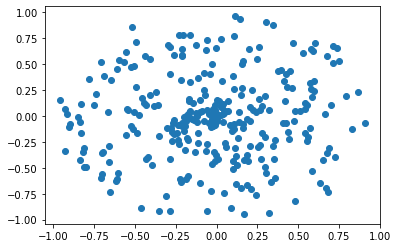

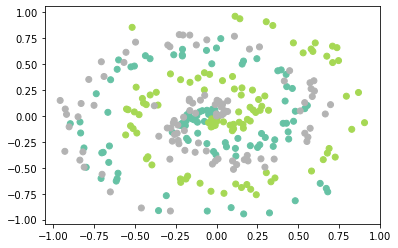

In [79]:
import matplotlib.pyplot as plt

X, y = create_data(100, 3)

f1 = plt.figure(1)
plt.scatter(X[:, 0], X[:, 1])

f2 = plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set2')

plt.show()


In [82]:
layer1 = Layer_Dense(2, 5)
activation1 = Activation_RelU()

layer1.forward(X)
print(f"Output for Layer 1 forwards pass:\n {layer1.output}")

activation1.forward(layer1.output)
print(f"Output for Layer 1 after passing through RelU activation:\n {activation1.output}")

Output for Layer 1 forwards pass:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.29046741e-04 -1.87657982e-05 -4.49277498e-04 -1.31352756e-03
  -6.38559777e-06]
 [-4.23126508e-04  7.97793713e-05 -7.42698768e-04 -2.78755081e-03
   6.33103547e-05]
 ...
 [-5.34509325e-03 -7.08527504e-02 -6.41775981e-02  1.91472309e-01
  -4.63596301e-02]
 [-2.23590563e-02 -9.82580785e-02 -1.17385011e-01  1.75954807e-01
  -6.39042535e-02]
 [ 3.92163937e-03 -5.16923892e-02 -3.19694604e-02  1.86567980e-01
  -3.40253049e-02]]
Output for Layer 1 after passing through RelU activation:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 7.97793713e-05 0.00000000e+00 0.00000000e+00
  6.33103547e-05]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.91472309e-01
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.75954807e-01
  0